#**Question 1-Delivery_time -> Predict delivery time using sorting time**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Exploratory Data Analysis and Data Visualization**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Correlation Analysis**

In [ ]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


**Feature Engineering**

In [ ]:
# Renaming Columns 
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Data Visualization**

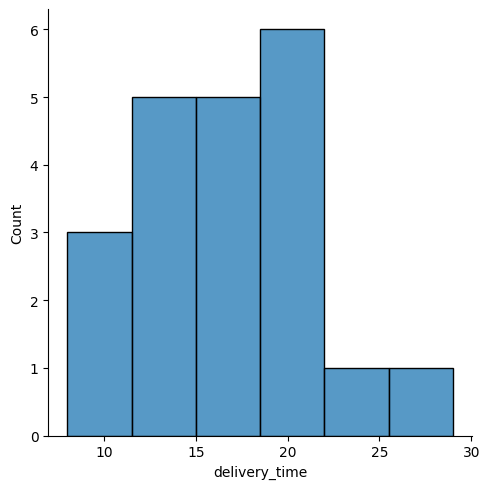

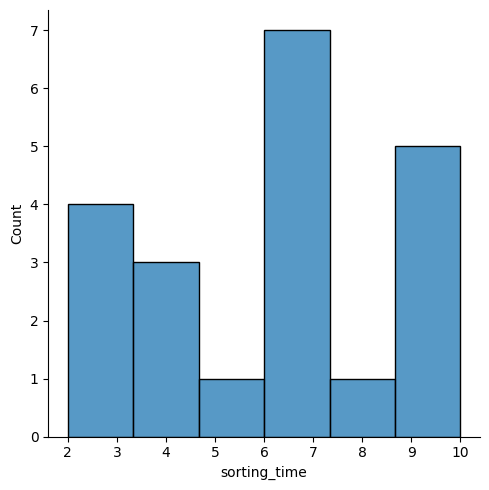

In [ ]:
sns.displot(data['delivery_time'])
sns.displot(data['sorting_time'])

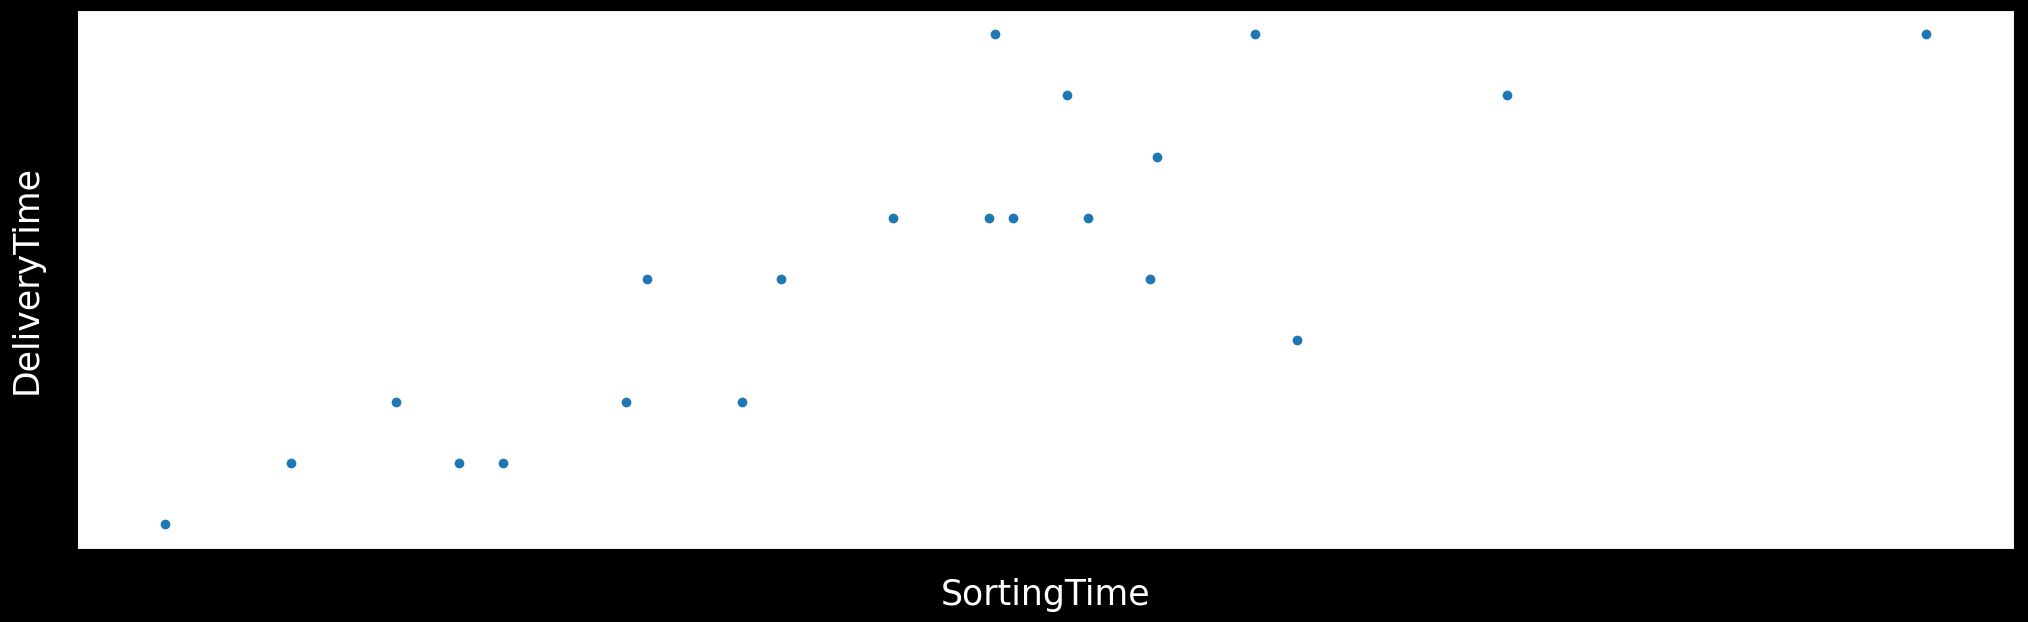

In [ ]:
plt.figure(figsize=(25,7),facecolor="black")
plt.scatter(data.delivery_time,data.sorting_time)
plt.xlabel("SortingTime",color="white",size=25)
plt.ylabel("DeliveryTime",color="white",size=25)
plt.show()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

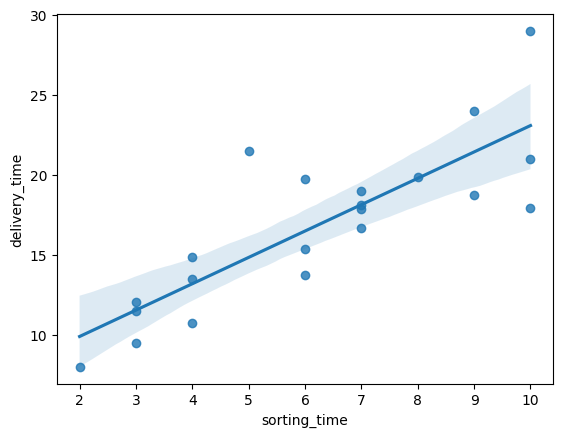

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

**Stats Model 1**

In [ ]:
model1= smf.ols("delivery_time~sorting_time" ,data=data).fit()
model1

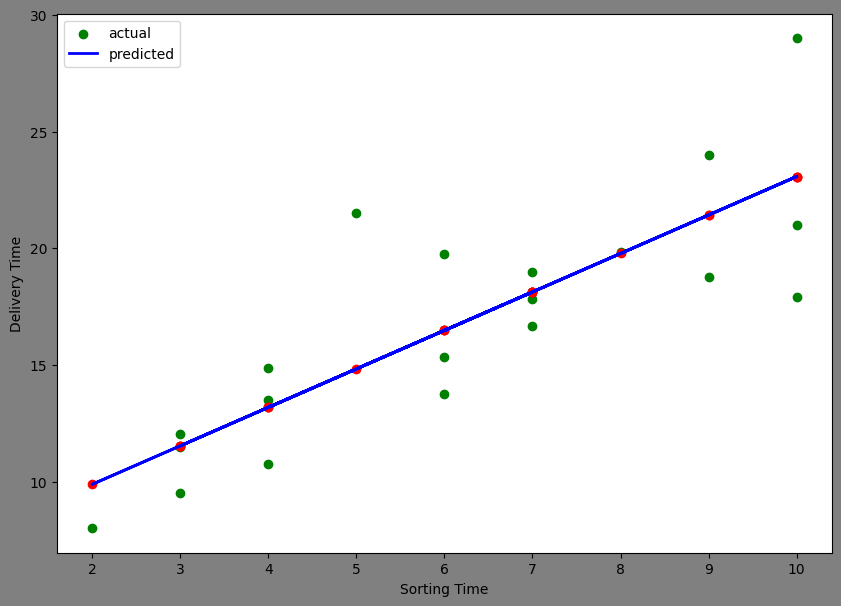

In [ ]:
predicted1=model1.predict() 

plt.figure(figsize=(10,7),facecolor="grey")
plt.scatter(data.sorting_time,data.delivery_time,color="green",label="actual")
plt.plot(data.sorting_time,predicted1,label="predicted",color="blue",linewidth=2)
plt.scatter(data.sorting_time,predicted1,color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

In [ ]:
#coefficients
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues, pvalues and rsquared values

In [ ]:
model1.tvalues, model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# model 1 summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        07:15:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 2**

In [ ]:
model2= smf.ols('delivery_time~np.log(sorting_time)' ,data=data).fit()

In [ ]:
predicted2=model2.predict()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        07:17:17   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 3**

In [ ]:
model3= smf.ols("np.log(delivery_time)~sorting_time" ,data=data).fit()

In [ ]:
predicted3=np.exp(model3.predict())

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 02 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                           07:18:29   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 4**

In [ ]:
sorting_time_sqr=(data.sorting_time**2)

In [ ]:
model4= smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sqr" ,data=data).fit()

In [ ]:
predicted4=np.exp(model4.predict())

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Fri, 02 Jun 2023   Prob (F-statistic):           2.20e-06
Time:                           07:21:04   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time         0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sqr    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predict delivery time using sorting time**

In [ ]:
data_pred= pd.DataFrame(data,columns=['sorting_time'])
pred_data=model4.predict(data_pred)

In [ ]:
' actual delivery time ' ' \n ', data['delivery_time']

(' actual delivery time  \n ',
 0     21.00
 1     13.50
 2     19.75
 3     24.00
 4     29.00
 5     15.35
 6     19.00
 7      9.50
 8     17.90
 9     18.75
 10    19.83
 11    10.75
 12    16.68
 13    11.50
 14    12.03
 15    14.88
 16    13.75
 17    18.11
 18     8.00
 19    17.83
 20    21.50
 Name: delivery_time, dtype: float64)

In [ ]:
'predicted delivery␣↪time' '\n',np.exp(pred_data)

('predicted delivery␣↪time\n',
 0     21.646921
 1     12.909227
 2     16.995933
 3     21.176938
 4     21.646921
 5     16.995933
 6     18.764526
 7     10.825502
 8     21.646921
 9     21.176938
 10    20.191891
 11    12.909227
 12    18.764526
 13    10.825502
 14    10.825502
 15    12.909227
 16    16.995933
 17    18.764526
 18     8.847949
 19    18.764526
 20    15.003730
 dtype: float64)

In [ ]:
#predicted delivery time for same sorting time
np.exp(pred_data)

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [ ]:
data['PRED DATA'] =np.exp(pred_data)
data

,delivery_time,sorting_time,PRED DATA
0,21.00,10,21.646921
1,13.50,4,12.909227
2,19.75,6,16.995933
3,24.00,9,21.176938
4,29.00,10,21.646921
5,15.35,6,16.995933
6,19.00,7,18.764526
7,9.50,3,10.825502
8,17.90,10,21.646921
9,18.75,9,21.176938


#**QUESTION 2 - simple linear regression (Salary hike)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Correlation Analysis**

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Renaming the columns**

In [ ]:
data=data.rename({'YearsExperience' : 'YRS_E'},axis=1)
data=data.rename({'Salary' : 'SLRY'},axis=1)
data

,YRS_E,SLRY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**Data Visualization**

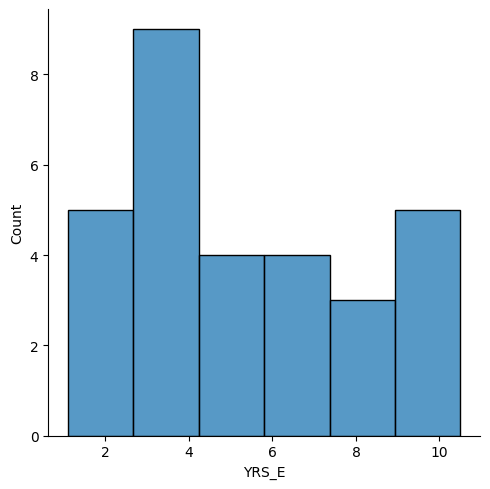

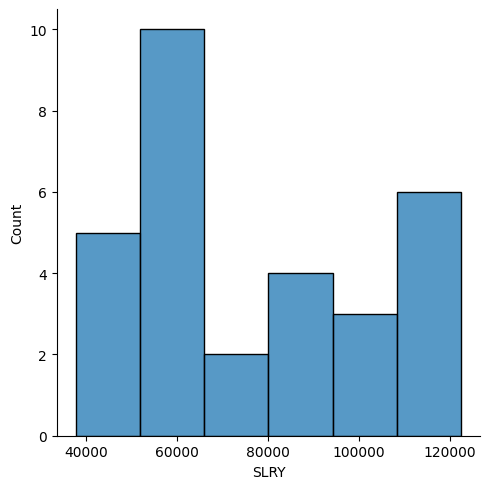

In [ ]:
sns.displot(data['YRS_E'])
sns.displot(data['SLRY'])

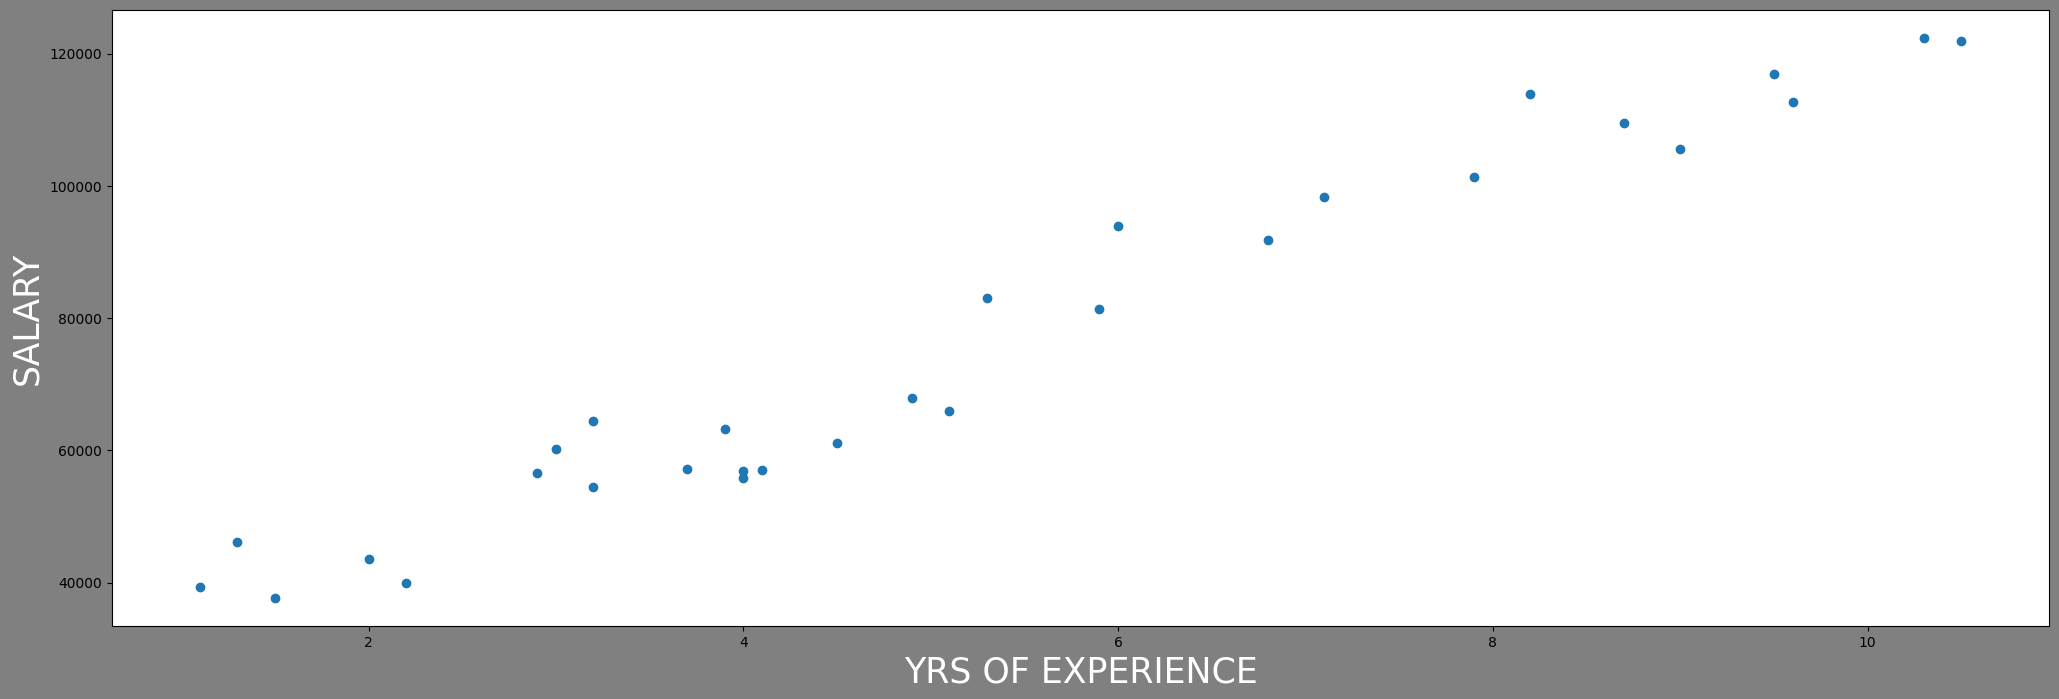

In [ ]:
plt.figure(figsize=(25,8),facecolor="grey")
plt.scatter(data.YRS_E,data.SLRY)
plt.xlabel("YRS OF EXPERIENCE",color="white",size=25)
plt.ylabel("SALARY",color="white",size=25)
plt.show()

**Stats Model 1**

In [ ]:
model1=smf.ols("SLRY~YRS_E" , data=data).fit()

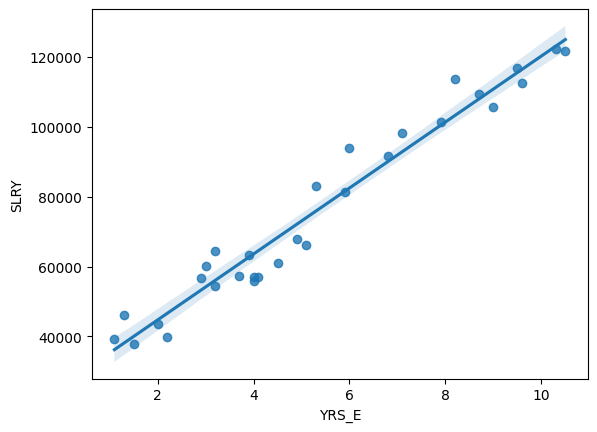

In [ ]:
sns.regplot(x="YRS_E" , y="SLRY" ,data=data);

In [ ]:
predicted1=model1.predict()

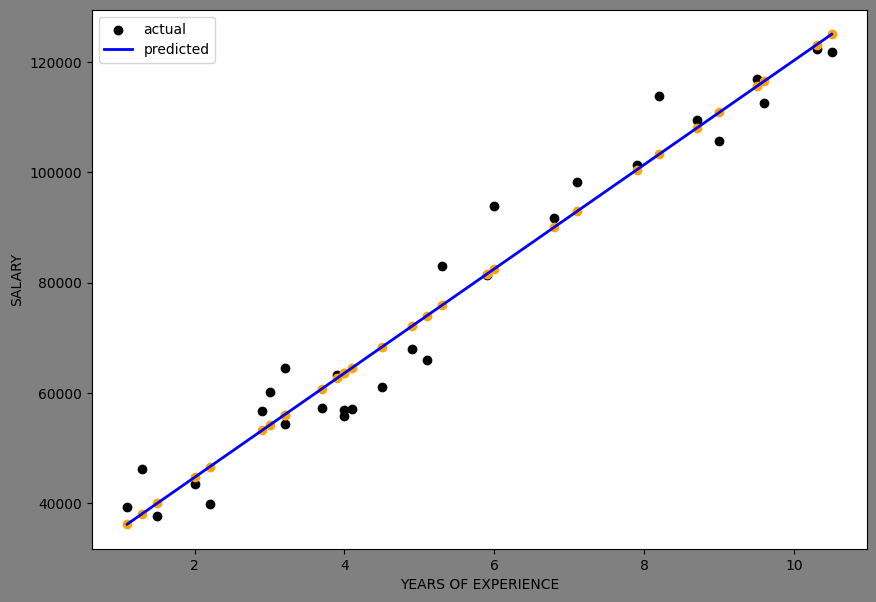

In [ ]:
plt.figure(figsize=(10,7),facecolor="grey")
plt.scatter(data.YRS_E,data.SLRY,color="black",label="actual")
plt.plot(data.YRS_E,predicted1,label="predicted",color="blue",linewidth=2)
plt.scatter(data.YRS_E,predicted1,color="orange")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.legend(loc="best")
plt.show()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SLRY   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        07:33:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YRS_E       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 2**

In [ ]:
model2=smf.ols("SLRY~np.log(YRS_E)" , data=data).fit()

In [ ]:
predicted2=model2.predict()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SLRY   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        07:34:52   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YRS_E)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 3**

In [ ]:
model3=smf.ols("np.log(SLRY)~YRS_E" , data=data).fit()

In [ ]:
predicted3=np.exp(model3.predict())

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(SLRY)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        07:35:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YRS_E          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Stats Model 4**

In [ ]:
YRSE_SQR=(data.YRS_E**2)

In [ ]:
model4=smf.ols("np.log(SLRY)~YRS_E+YRSE_SQR" , data=data).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(SLRY)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.95e-18
Time:                        07:36:42   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
YRS_E          0.2024      0.027      7.601      0.000       0.148       0.257
YRSE_SQR      -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Salary Prediction**

In [ ]:
data_pred= pd.DataFrame(data,columns=['YRS_E'])

pred_data=model1.predict(data_pred)
pred_data

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [ ]:
data['PRED SALRY']=pred_data
data

,YRS_E,SLRY,PRED SALRY
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
